<a href="https://colab.research.google.com/github/SunnyDahitJ/ML-programs/blob/main/lab_8(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv("Crop_recommendation.csv")
df 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object
[

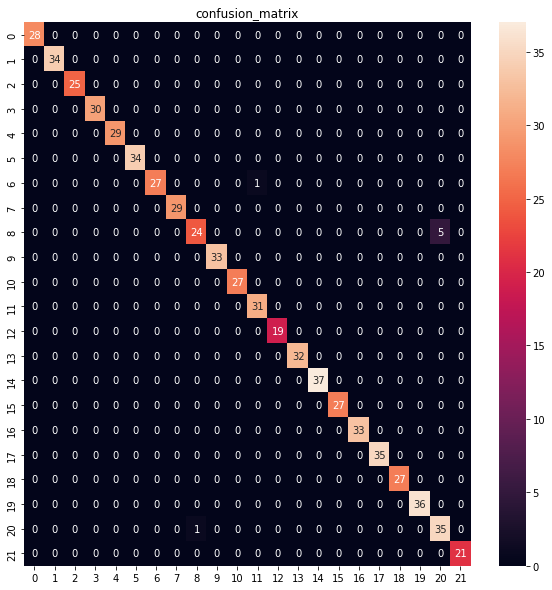

0.9893939393939394


In [41]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df=df[:400]

x = df.drop("label", axis = 1)

y = df["label"]
print(x)
print(y)


from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= .30, shuffle= True)

C = 1.0
model = SVC(kernel= "linear", C = C)

train  = model.fit(X_train, y_train)

# print(train)

y_pred = model.predict(X_test)

# print(y_pred)



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

c_matrix = confusion_matrix(y_pred, y_test)
print(c_matrix)


plt.rcParams["figure.figsize"] = (10,10)
heat = sns.heatmap(data= c_matrix,annot=True)
plt.title("confusion_matrix")
plt.show()


print(accuracy_score(y_pred, y_test))

Prediction using Polynomial method : 0.9848484848484849
Classificatio is as follows 

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        34
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        29
      coffee       1.00      1.00      1.00        34
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.78      0.88        32
 kidneybeans       1.00      0.94      0.97        35
      lentil       1.00      0.96      0.98        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        19
   mothbeans       0.97      1.00      0.98        31
    mungbean       1.00      1.00      1.00        37
   muskmelon       1.00      1.00      1.00     

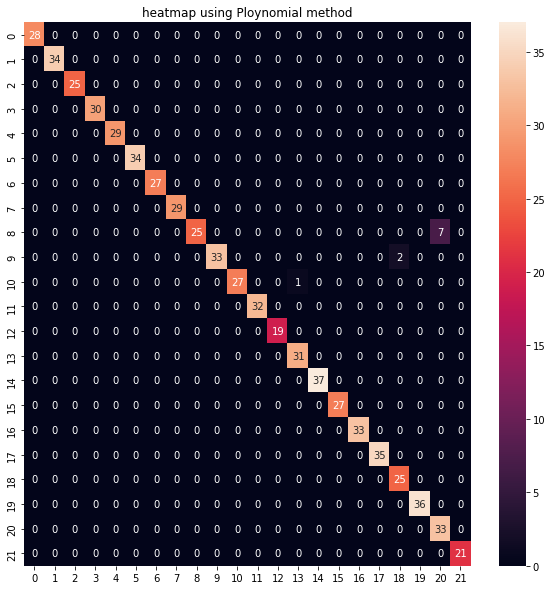

In [42]:
model2 = SVC(kernel="poly",degree=3, C=C)
model2.fit(X_train, y_train)

p_pred = model2.predict(X_test)

print(f"Prediction using Polynomial method : {accuracy_score(p_pred, y_test)}")

print(f"Classificatio is as follows \n\n {classification_report(p_pred,y_test)}")

p_cmatrix= confusion_matrix(p_pred, y_test)

plt.rcParams["figure.figsize"] = (10,10)

p_heat = sns.heatmap(data = p_cmatrix, annot = True)
plt.title("heatmap using Ploynomial method")
plt.show()


Prediction using RBF method : 0.9848484848484849
Classificatio is as follows 

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        34
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        29
      coffee       1.00      1.00      1.00        34
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.78      0.88        32
 kidneybeans       1.00      0.94      0.97        35
      lentil       1.00      0.96      0.98        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        19
   mothbeans       0.97      1.00      0.98        31
    mungbean       1.00      1.00      1.00        37
   muskmelon       1.00      1.00      1.00        27
 

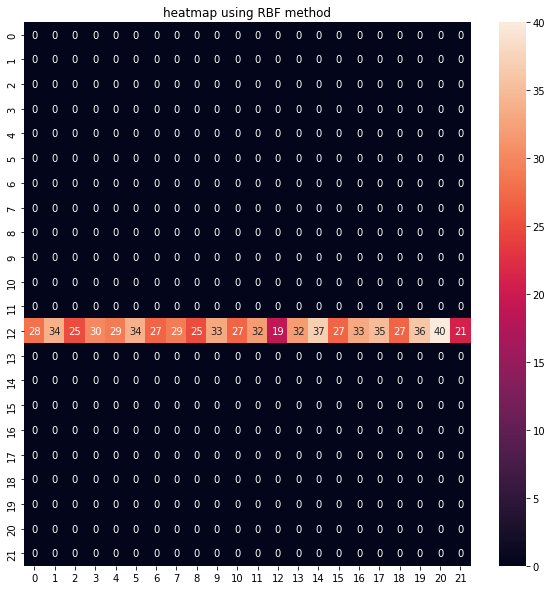

In [43]:
model3 = SVC(kernel="rbf",gamma=0.8, C=C)
model3.fit(X_train, y_train)

r_pred = model3.predict(X_test)

print(f"Prediction using RBF method : {accuracy_score(p_pred, y_test)}")

print(f"Classificatio is as follows \n\n {classification_report(p_pred,y_test)}")

r_cmatrix= confusion_matrix(r_pred, y_test)


plt.rcParams["figure.figsize"] = (10,10)
r_heat = sns.heatmap(data = r_cmatrix, annot = True)
plt.title("heatmap using RBF method")
plt.show()
